In [9]:


from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf
import matplotlib.pyplot as plt

plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'
FLAGS = None
%matplotlib inline


# Import data
mnist = input_data.read_data_sets('/tmp/tensorflow/mnist/input_dat', one_hot=True)

print(mnist.train.images.shape)
print(mnist.test.images.shape)


    


Extracting /tmp/tensorflow/mnist/input_dat\train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_dat\train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_dat\t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_dat\t10k-labels-idx1-ubyte.gz
(55000, 784)
(10000, 784)


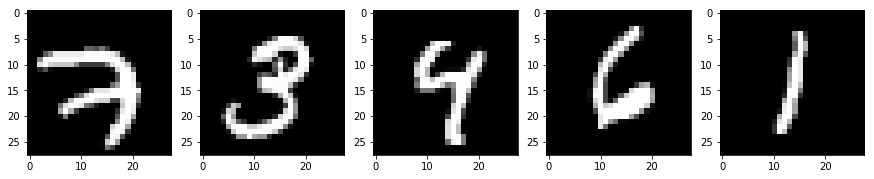

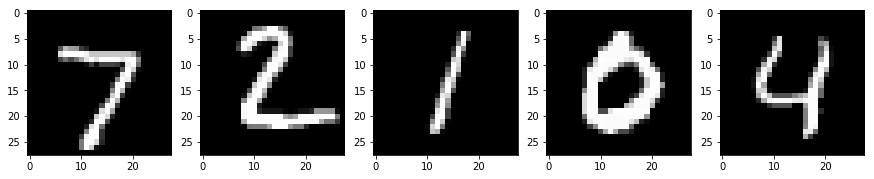

In [10]:
# Show first five figures from training set and testing set.
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(mnist.train.images[i].reshape(28, 28))

plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(mnist.test.images[i].reshape(28, 28))

In [11]:
    
# Create the placeholders and variables
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

#model
y = tf.matmul(x, W) + b

# Define prediction
y_ = tf.placeholder(tf.float32, [None, 10])

#loss
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

#gradientdescent  on loss 
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)



sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
  # Train
for _ in range(1000):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

  # Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("results")
print(sess.run(accuracy, feed_dict={x: mnist.test.images,
                                      y_: mnist.test.labels}))


results
0.919


In [12]:
import numpy as np
feed_dict = {x: mnist.test.images, y_: mnist.test.labels}
inferred_labels = tf.argmax(y, 1).eval(feed_dict=feed_dict)
correct_labels = tf.argmax(y_, 1).eval(feed_dict=feed_dict)
is_correct = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1)).eval(feed_dict=feed_dict)

# Indices of misclassified images
misclassified_idxs = np.arange(len(mnist.test.images))[~is_correct]

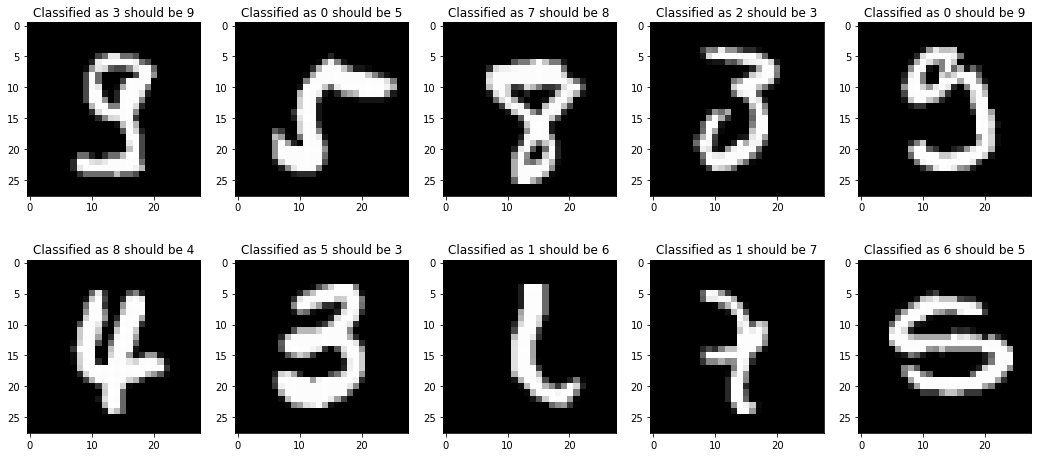

In [13]:

plt.figure(figsize=(18, 8))
subplot = 1
for i in np.random.choice(misclassified_idxs, size=10, replace=False):
    plt.subplot(2, 5, subplot)
    plt.imshow(mnist.test.images[i].reshape(28, 28))
    subplot += 1
    title = 'Classified as {} should be {}'.format(inferred_labels[i],
                                                   correct_labels[i])
    plt.title(title)

In [14]:
def weights_map():
    # Get the values for the weights from the TensorFlow variable.
    w = sess.run(W)
    
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)
    
    
    img_size = 28

    img_size_flat = img_size * img_size

    img_shape = (img_size, img_size)

    num_classes = 10
  
    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        if i<10:

            image = w[:, i].reshape(img_shape)

            ax.set_xlabel("Weights: {0}".format(i))

            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')

        ax.set_xticks([])
        ax.set_yticks([])

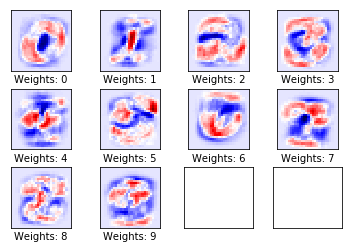

In [15]:
weights_map()